In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Bagging**

Bagging, or Bootstrap Aggregating, is an ensemble learning technique that improves the accuracy and stability of machine learning models by combining multiple weak learners. It reduces variance and prevents overfitting, making models more robust. Bagging is particularly useful for high-variance models like decision trees.

In [2]:
#loading the dataset
df=sns.load_dataset('iris')

In [3]:
df.drop(columns={"sepal_length","petal_width"},inplace=True)

In [4]:
#label encoding the target column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])

In [5]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
x=df.drop(columns={"species"})
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
x

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


In [7]:
y.value_counts()

,count
species,
0,50
1,50
2,50


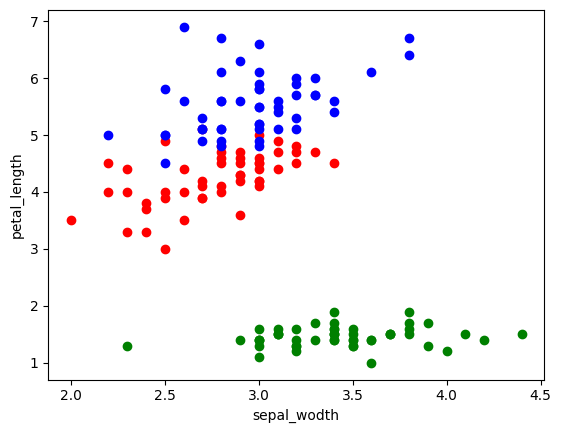

In [8]:
plt.scatter(x.iloc[:,0][y==0],x.iloc[:,1][y==0],color="green")
plt.scatter(x.iloc[:,0][y==1],x.iloc[:,1][y==1],color="red")
plt.scatter(x.iloc[:,0][y==2],x.iloc[:,1][y==2],color="blue")
plt.xlabel("sepal_wodth")
plt.ylabel("petal_length")
plt.show()

In [9]:
#creating samples with replacement
data=pd.concat([x_train,y_train],axis=1)
sample1=data.sample(frac=0.8,replace=True)
sample2=data.sample(frac=0.8,replace=True)
sample3=data.sample(frac=0.8,replace=True)

In [10]:
sample1

,sepal_width,petal_length,species
16,3.9,1.3,0
48,3.7,1.5,0
33,4.2,1.4,0
126,2.8,4.8,2
139,3.1,5.4,2
...,...,...,...
51,3.2,4.5,1
119,2.2,5.0,2
81,2.4,3.7,1
148,3.4,5.4,2


In [11]:
#training the models with the samples
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier()
dtc2=DecisionTreeClassifier()
dtc3=DecisionTreeClassifier()
dtc1.fit(sample1.iloc[0:,0:2],sample1.iloc[0:,-1])
dtc2.fit(sample2.iloc[0:,0:2],sample2.iloc[0:,-1])
dtc3.fit(sample3.iloc[0:,0:2],sample3.iloc[0:,-1])

DecisionTreeClassifier()

In [12]:
test_data=pd.concat([x_test,y_test],axis=1)
print(test_data)

     sepal_width  petal_length  species
73           2.8           4.7        1
18           3.8           1.7        0
118          2.6           6.9        2
78           2.9           4.5        1
76           2.8           4.8        1
31           3.4           1.5        0
64           2.9           3.6        1
141          3.1           5.1        2
68           2.2           4.5        1
82           2.7           3.9        1
110          3.2           5.1        2
12           3.0           1.4        0
36           3.5           1.3        0
9            3.1           1.5        0
19           3.8           1.5        0
56           3.3           4.7        1
104          3.0           5.8        2
69           2.5           3.9        1
55           2.8           4.5        1
132          2.8           5.6        2
29           3.2           1.6        0
127          3.0           4.9        2
26           3.4           1.6        0
128          2.8           5.6        2


In [13]:
def find_most_frequent(arr):
    counts = {}
    for item in arr:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    most_frequent = max(counts, key=counts.get)
    return most_frequent

In [14]:
test_data.index

Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,   9,
        19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145, 108, 143,
        45,  30],
      dtype='int64')

In [15]:
#prediction on the test data
y_pred1=dtc1.predict([test_data.iloc[16,0:2]])
y_pred2=dtc2.predict([test_data.iloc[16,0:2]])
y_pred3=dtc3.predict([test_data.iloc[16,0:2]])
predicted_value=find_most_frequent(np.array([y_pred1,y_pred2,y_pred3]).flatten())
print(predicted_value)
print(test_data.species.iloc[16])

2
2


## **Pasting:**


Pasting is a variant of bagging where the key difference is sampling without replacement instead of with replacement. It still follows the same ensemble learning principles as bagging but changes how training subsets are selected.

In [16]:
#creating samples without replacement
data=pd.concat([x_train,y_train],axis=1)
sample1=data.sample(frac=0.8)
sample2=data.sample(frac=0.8)
sample3=data.sample(frac=0.8)

In [17]:
#training the models with the samples
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier()
dtc2=DecisionTreeClassifier()
dtc3=DecisionTreeClassifier()
dtc1.fit(sample1.iloc[0:,0:2],sample1.iloc[0:,-1])
dtc2.fit(sample2.iloc[0:,0:2],sample2.iloc[0:,-1])
dtc3.fit(sample3.iloc[0:,0:2],sample3.iloc[0:,-1])

DecisionTreeClassifier()

In [18]:
test_data=pd.concat([x_test,y_test],axis=1)
print(test_data.species)

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: species, dtype: int64


In [19]:
#prediction on the test data
y_pred1=dtc1.predict([test_data.iloc[0,0:2]])
y_pred2=dtc2.predict([test_data.iloc[0,0:2]])
y_pred3=dtc3.predict([test_data.iloc[0,0:2]])
predicted_value=find_most_frequent(np.array([y_pred1,y_pred2,y_pred3]).flatten())
print(predicted_value)
print(test_data.species.iloc[0])

1
1


##**Random Subspaces**

Random Subspaces is a variant of Bagging where randomness is introduced by selecting random subsets of features instead of (or in addition to) random subsets of data samples. This helps decorrelate base models and improve generalization.

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
random_subspaces_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    max_features=2,
    bootstrap=False,
    bootstrap_features=True,
    random_state=42
)
random_subspaces_model.fit(X_train, y_train)
y_pred = random_subspaces_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Subspaces Classifier Accuracy: {accuracy:.4f}')


Random Subspaces Classifier Accuracy: 0.9667


##**Bagging Classifier**

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [22]:
#loading the dataset
X,y=make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=10,
    n_redundant=0,
    random_state=42,
)
X.shape

(1000, 10)

In [23]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
#training with single deciosion tree
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predicted_values=dtc.predict(X_test)
print("accuracy score:",accuracy_score(y_test,predicted_values))

accuracy score: 0.87


**1)Standard Bagging:**

In [25]:
#using bagging classifier
bagging_model=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    bootstrap=True,
    random_state=42
)
bagging_model.fit(X_train,y_train)
predicted_values=bagging_model.predict(X_test)
print("accuracy score:",accuracy_score(y_test,predicted_values))

accuracy score: 0.885


In [26]:
#no.of rows used for each model
print(bagging_model.estimators_samples_[0].shape)

(800,)


In [27]:
#no.of cols used for each model
print(bagging_model.estimators_features_[0].shape)

(10,)


**2)Random Subspaces:**

In [28]:
#Random subspaces in bagging classifier
bagging_model=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    bootstrap_features=True,
    random_state=42,
    max_features=0.8,
)
bagging_model.fit(X_train,y_train)
predicted_values=bagging_model.predict(X_test)
print("accuracy score:",accuracy_score(y_test,predicted_values))

accuracy score: 0.89


In [29]:
#no.of rows used for each model
print(bagging_model.estimators_samples_[0].shape)

(800,)


In [30]:
#no.of cols used for each model
print(bagging_model.estimators_features_[0].shape)

(8,)


**3)Pasting:**

In [31]:
#pasting in bagging classifier
bagging_model=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    bootstrap=False,
)
bagging_model.fit(X_train,y_train)
predicted_values=bagging_model.predict(X_test)
print("accuracy score:",accuracy_score(y_test,predicted_values))

accuracy score: 0.87


In [32]:
#no.of rows used for each model
print(bagging_model.estimators_samples_[0].shape)

(800,)


In [33]:
#no.of cols used for each model
print(bagging_model.estimators_features_[0].shape)

(10,)


**4)Random Patches:**

In [34]:
#using random patches in bagging classifier
bagging_model=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    bootstrap=True,
    bootstrap_features=True,
    max_features=0.8,
    max_samples=0.8,
  )
bagging_model.fit(X_train,y_train)
predicted_values=bagging_model.predict(X_test)
print("accuracy score:",accuracy_score(y_test,predicted_values))

accuracy score: 0.9


In [35]:
#no.of rows used for each model
print(bagging_model.estimators_samples_[0].shape)

(640,)


In [36]:
#no.of cols used for each model
print(bagging_model.estimators_features_[0].shape)

(8,)


**OOB Score in bagging:**

In [37]:
#using bagging classifier
bagging_model=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=300,
    bootstrap=True,
    random_state=42,
    oob_score=True,
)
bagging_model.fit(X_train,y_train)
predicted_values=bagging_model.predict(X_test)
print("accuracy score:",accuracy_score(y_test,predicted_values))
print("oob score: ",bagging_model.oob_score_)

accuracy score: 0.89
oob score:  0.91125


#using Bagging classifier to classify the handdigits

In [38]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import BaggingClassifier

In [39]:
#importing the dataset
df=pd.read_csv("/content/sample_data/mnist_train_small.csv")

In [40]:
df.shape

(19999, 785)

In [41]:
df.rename(
    columns={"6":"label"},inplace=True
)

In [42]:
df["label"].value_counts().sort_index()

,count
label,
0,1962
1,2243
2,1989
3,2021
4,1924
5,1761
6,2038
7,2126
8,1912


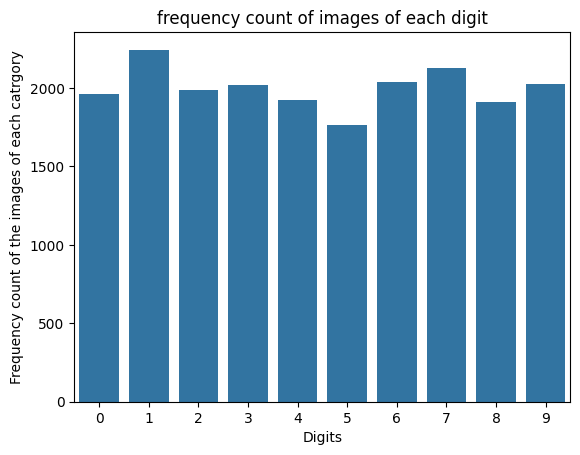

In [43]:
##distribution of the labels
import seaborn as sns
sns.barplot(df["label"].value_counts().sort_index())
plt.xlabel("Digits")
plt.ylabel("Frequency count of the images of each catrgory")
plt.title("frequency count of images of each digit")
plt.show()

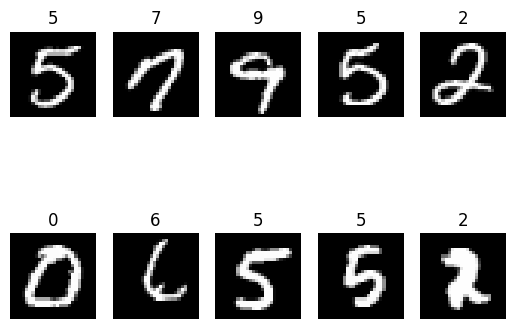

In [44]:
#visualizing the digits
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(df.iloc[i,1:].values.reshape(28,28),cmap="gray")
  plt.title(df.iloc[i,0])
  plt.axis("off")
plt.show()

#Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X=df.drop(columns=["label"])
y=df["label"]

In [46]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42,
)

In [47]:
X_train.shape

(15999, 784)

In [48]:
y_train.shape

(15999,)

In [49]:
X_test.shape

(4000, 784)

In [50]:
y_test.shape

(4000,)

In [51]:
#applying the decision tree classifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print("accuracy score of the model is: ",accuracy_score(y_test,y_pred))

accuracy score of the model is:  0.82975


In [52]:
#prediction
y_pred=dtc.predict([X_test.iloc[1]])
print(y_pred)

[7]


Text(0.5, 1.0, '[2]')

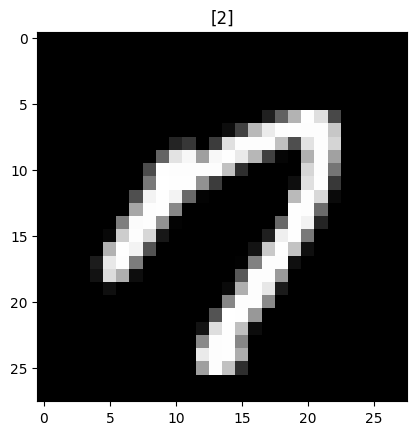

In [53]:
plt.imshow(df.iloc[1,1:].values.reshape(28,28),cmap="gray")
plt.title(dtc.predict(X_test.iloc[0:1]))

#prediction using the unseen data

In [54]:
test_data=pd.read_csv("/content/sample_data/mnist_test.csv")

In [55]:
test_data.rename(
    columns={"7":"label"},inplace=True
)

In [56]:
y_pred=dtc.predict(test_data.drop(columns=["label"]).values)
print("accuracy score of the model is: ",accuracy_score(test_data["label"],y_pred))

accuracy score of the model is:  0.8357835783578358


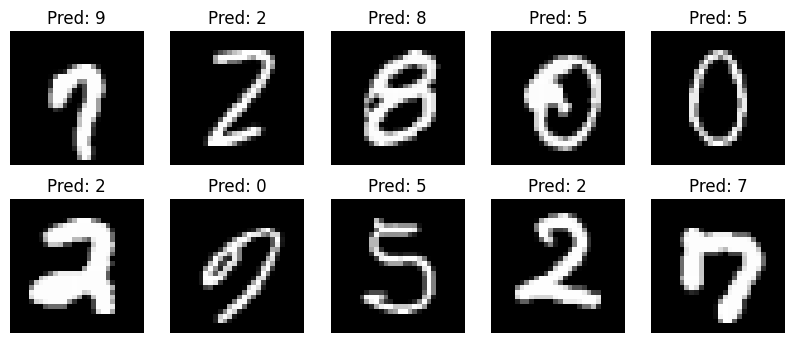

In [57]:
# visualizing the digits
indices = np.random.randint(0, test_data.shape[0], 10)

plt.figure(figsize=(10, 4))

for idx, i in enumerate(indices):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(test_data.iloc[i, 1:].values.reshape(28, 28), cmap="gray")
    pred = dtc.predict([test_data.iloc[i, 1:].values])
    plt.title(f"Pred: {pred[0]}")
    plt.axis("off")

plt.show()


#using the baggingclassifier

In [58]:
#loading the train and test data
train_data=pd.read_csv("/content/sample_data/mnist_train_small.csv")
test_data=pd.read_csv("/content/sample_data/mnist_test.csv")

In [59]:
train_data.shape

(19999, 785)

In [60]:
test_data.shape

(9999, 785)

In [61]:
#changing the output column to label
train_data.rename(
    columns={
        "6":"label"
    },inplace=True,
)
test_data.rename(
    columns={
        "7":"label"
    },inplace=True,
)

In [62]:
# #splittin the train data
# X_train,X_test,y_train,y_test=train_test_split(
#     train_data.drop(columns=["label"]),
#     train_data["label"],
#     test_size=0.2,
#     random_state=42
# )

In [63]:
#fitting the bagging classifier model
bag=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.40,
    bootstrap=True,
    random_state=42,
)

In [64]:
bag.fit(train_data.iloc[:,1:],train_data["label"])

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.4,
                  n_estimators=100, random_state=42)

In [65]:
bag.estimators_samples_[0].shape

(7999,)

In [66]:
bag.estimators_features_[0].shape

(784,)

In [72]:
test_data["label"].values

array([2, 1, 0, ..., 4, 5, 6])

#Prediction using unseen data

In [78]:
y_pred=bag.predict(test_data.iloc[:,1:].values)
print("accuracy score of the model is: ",accuracy_score(test_data["label"].values,y_pred))

accuracy score of the model is:  0.9351935193519352


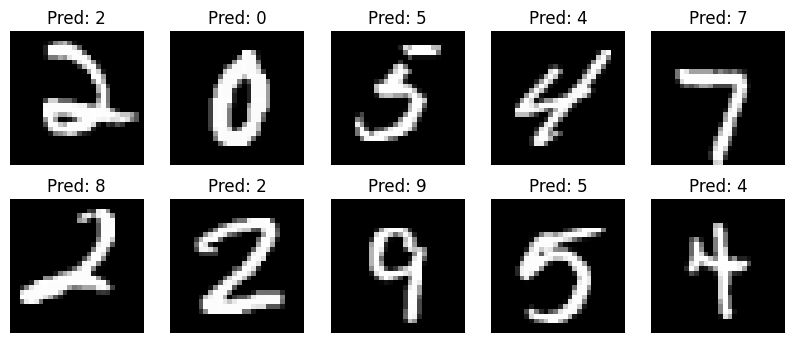

In [79]:
# visualizing the digits
indices = np.random.randint(0, test_data.shape[0], 10)

plt.figure(figsize=(10, 4))

for idx, i in enumerate(indices):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(test_data.iloc[i, 1:].values.reshape(28, 28), cmap="gray")
    pred = dtc.predict([test_data.iloc[i, 1:].values])
    plt.title(f"Pred: {pred[0]}")
    plt.axis("off")
plt.show()

#**BaggingRegressor**

In [129]:
import numpy as np

# 2D nonlinear dataset
np.random.seed(42)

X_2d = np.linspace(-5, 5, 200).reshape(-1, 1)
y_2d = np.sin(X_2d) + 0.3 * np.random.randn(200, 1)


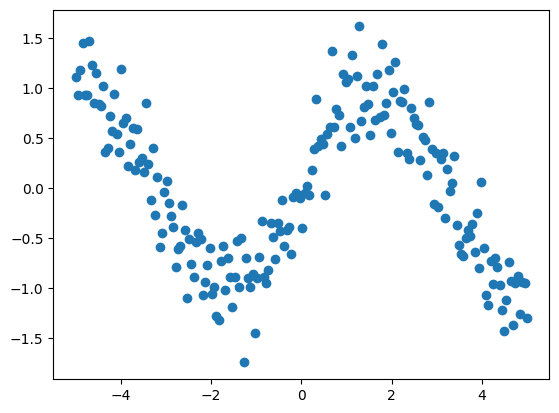

In [130]:
plt.scatter(X_2d,y_2d)

#DecisionTreeregressor

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test=train_test_split(X_2d,y_2d,test_size=0.25,random_state=42)

In [162]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth":[1,2,3,4,5,6,7,8,9,10,None],
        "criterion":["squared_error","friedman_mse"],
        "splitter":["best","random"],
    }
)
cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'splitter': ['best', 'random']})

In [163]:
cv.best_estimator_

DecisionTreeRegressor(max_depth=8, splitter='random')

In [164]:
cv.best_params_

{'criterion': 'squared_error', 'max_depth': 8, 'splitter': 'random'}

In [160]:
cv.best_score_

np.float64(0.7790493762394747)

In [165]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=8,splitter="random",criterion="squared_error")
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, splitter='random')

In [166]:
y_pred=dtr.predict(X_test)
print("r2 score of the model is: ",r2_score(y_test,y_pred))

r2 score of the model is:  0.8018861057474989


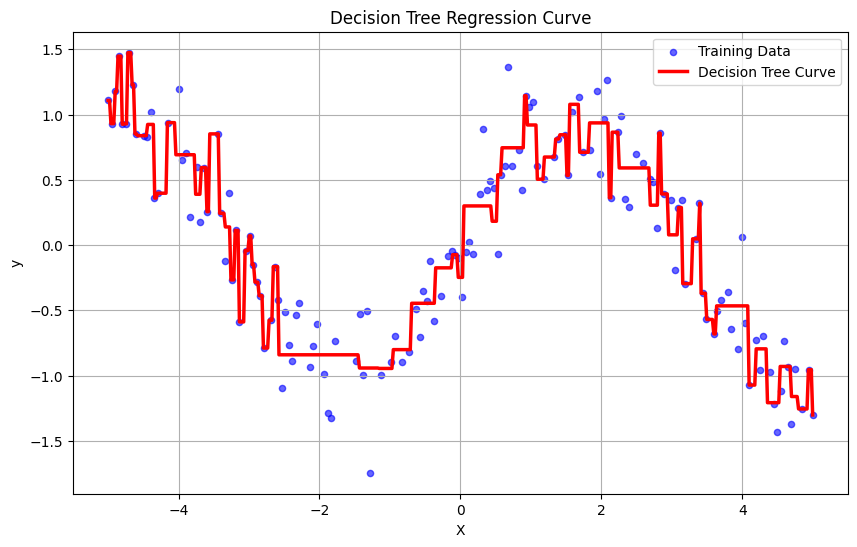

In [167]:

X_curve = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)

# Predictions for the curve
y_curve = dtr.predict(X_curve)

# Plot
plt.figure(figsize=(10,6))

# Scatter the original training data
plt.scatter(X_train, y_train, color="blue", s=20, label="Training Data", alpha=0.6)

# Model curve
plt.plot(X_curve, y_curve, color="red", linewidth=2.5, label="Decision Tree Curve")

plt.title("Decision Tree Regression Curve")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#Using the Bagging Regressor

#Applying the gridsearch cv on the bagging regressor

In [201]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(
    estimator=BaggingRegressor(),
    param_grid={
        "n_estimators":[10,50,100,200],
        "max_samples":[0.25,0.5,0.75],
        "bootstrap":[True,False],
    }
)

In [202]:
cv.fit(X_train,y_train)

GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_samples': [0.25, 0.5, 0.75],
                         'n_estimators': [10, 50, 100, 200]})

In [203]:
cv.best_estimator_

BaggingRegressor(max_samples=0.25, n_estimators=200)

In [204]:
cv.best_params_

{'bootstrap': True, 'max_samples': 0.25, 'n_estimators': 200}

In [205]:
cv.best_score_

np.float64(0.8327403102646953)

In [206]:
from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=8,splitter="random",criterion="squared_error"),
    n_estimators=200,
    max_samples=0.25,
    bootstrap=True,

)

In [207]:
bgr.fit(X_train,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=8,
                                                 splitter='random'),
                 max_samples=0.25, n_estimators=200)

In [208]:
y_pred=bgr.predict(X_test)
print("r2 score of the model is: ",r2_score(y_test,y_pred))

r2 score of the model is:  0.8692814030373678


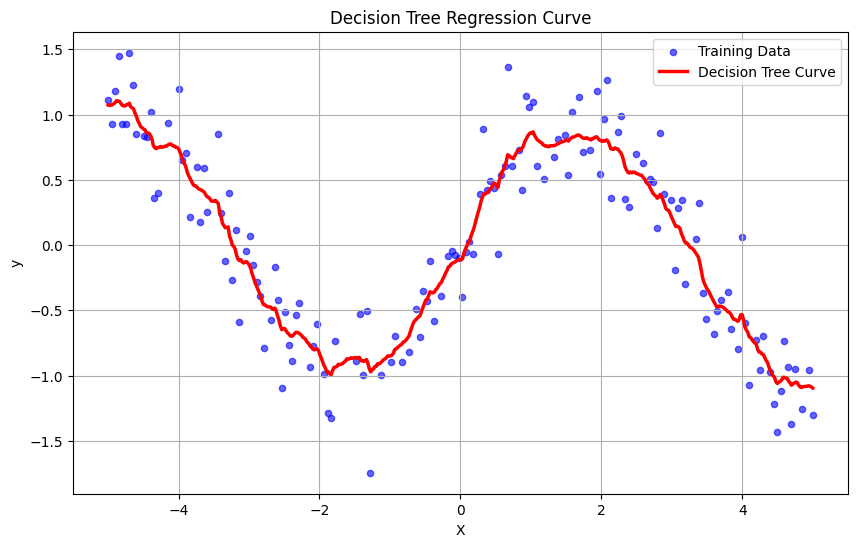

In [209]:

X_curve = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)

# Predictions for the curve
y_curve = bgr.predict(X_curve)

# Plot
plt.figure(figsize=(10,6))

# Scatter the original training data
plt.scatter(X_train, y_train, color="blue", s=20, label="Training Data", alpha=0.6)

# Model curve
plt.plot(X_curve, y_curve, color="red", linewidth=2.5, label="Decision Tree Curve")

plt.title("Decision Tree Regression Curve")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()